# 1. Analysis of Economics Data

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch01_visual_summary.jpg" alt="Chapter 01 Visual Summary" width="65%">

This notebook provides an interactive introduction to regression analysis using Python. You can run all code directly in Google Colab without any local setup required. The data streams directly from GitHub, making this notebook fully self-contained.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch01_Analysis_of_Economics_Data.ipynb)
<div class="chapter-resources">
<a href="https://www.youtube.com/watch?v=RyE01v-zliM" target="_blank" class="resource-btn">🎬 AI Video</a>
<a href="https://carlos-mendez.my.canva.site/s01-analysis-of-economics-data-pdf" target="_blank" class="resource-btn">✨ AI Slides</a>
<a href="https://cameron.econ.ucdavis.edu/aed/traedv1_01" target="_blank" class="resource-btn">📊 Cameron Slides</a>
<a href="https://app.edcafe.ai/quizzes/69715fdb60956f50e60276b9" target="_blank" class="resource-btn">✏️ Quiz</a>
<a href="https://app.edcafe.ai/chatbots/6971625960956f50e6028155" target="_blank" class="resource-btn">🤖 AI Tutor</a>
</div>


## Chapter Overview

This chapter introduces the fundamental concepts of econometrics and regression analysis. We'll explore how economists use statistical methods to understand relationships in economic data, focusing on a practical example of house prices and house sizes.

**What you'll learn:**

- What regression analysis is and why it's the primary tool in econometrics
- How to load and explore economic data using Python (pandas)
- How to visualize relationships between variables using scatter plots
- How to fit a simple linear regression model using Ordinary Least Squares (OLS)
- How to interpret regression coefficients in economic terms
- How to use Python's statsmodels package for regression analysis

**Dataset used:**

- **AED_HOUSE.DTA**: House sale prices for 29 houses in Central Davis, California (1999)
  - Variables: price (sale price in dollars), size (house size in square feet), plus 7 other characteristics

**Chapter outline:**

- 1.1 What is Regression Analysis?
- 1.2 Load the Data
- 1.3 Preview the Data
- 1.4 Explore the Data
- 1.5 Visualizing the Relationship
- 1.6 Fitting a Regression Line
- 1.7 Interpreting the Results
- 1.8 Visualizing the Fitted Line
- 1.9 Economic Interpretation and Examples
- Practice Exercises
- Case Studies

## Setup

Run this cell first to import all required packages and configure the environment. This sets up:

- Data manipulation (pandas, numpy)
- Statistical modeling (statsmodels)
- Visualization (matplotlib)
- Reproducibility (random seeds)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Set plotting style (dark theme matching book design)
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.facecolor': '#1a2235',
    'figure.facecolor': '#12162c',
    'grid.color': '#3a4a6b',
    'figure.figsize': (10, 6),
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': '#1a2235',
})

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 1.1 What is Regression Analysis?

**Regression analysis** is the primary tool economists use to understand relationships between variables. At its core, regression answers questions like: "How does Y change when X changes?"

In our example:

- **Y (dependent variable)**: House sale price (in dollars)
- **X (independent variable)**: House size (in square feet)

**The regression line** is the "line of best fit" that minimizes the sum of squared distances between actual prices and predicted prices. The mathematical form is:

$$\text{price} = \beta_0 + \beta_1 \times \text{size} + \varepsilon$$

Where:

- $\beta_0$ = **intercept** (predicted price when size = 0)
- $\beta_1$ = **slope** (change in price for each additional square foot)
- $\varepsilon$ = **error term** (random variation not explained by size)

**Economic Interpretation:**  
The slope coefficient $\beta_1$ tells us: "On average, how much more expensive is a house that is 1 square foot larger?" This is a measure of **association**, not necessarily causation.


> **Key Concept 1.1: Descriptive vs. Inferential Analysis**
>
> Descriptive analysis summarizes data using statistics and visualizations, while statistical inference uses sample data to draw conclusions about the broader population. Most econometric analysis involves statistical inference.



## 1.2 Load the Data

Let's load the house price dataset directly from GitHub. This dataset contains information on 29 house sales in Central Davis, California in 1999.

In [2]:
# Load the Stata dataset from GitHub
data_house = pd.read_stata(GITHUB_DATA_URL + 'AED_HOUSE.DTA')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {data_house.shape[0]} observations, {data_house.shape[1]} variables")

✓ Data loaded successfully!
  Shape: 29 observations, 8 variables


## 1.3 Preview the Data

Let's look at the first few rows to understand what variables we have available.

In [3]:
# Display first 5 rows
print("First 5 observations:")
print(data_house.head())

print("\nColumn names:")
print(data_house.columns.tolist())

First 5 observations:
    price  size  bedrooms  bathrooms  lotsize   age  monthsold    list
0  204000  1400         3        2.0        1  31.0          7  199900
1  212000  1600         3        3.0        2  33.0          5  212000
2  213000  1800         3        2.0        2  51.0          4  219900
3  220000  1600         3        2.0        1  49.0          4  229000
4  224500  2100         4        2.5        2  47.0          6  224500

Column names:
['price', 'size', 'bedrooms', 'bathrooms', 'lotsize', 'age', 'monthsold', 'list']



**Transition:** Before jumping into regression analysis, we need to understand our data. Descriptive statistics reveal the scale, variability, and range of our variables—essential for interpreting regression results.



## 1.4 Explore the Data

Before running any regression, it's essential to understand the data through **descriptive statistics**. Let's look at the key statistics for our variables of interest: price and size.

In [4]:
# Summary statistics for all variables
print("=" * 70)
print("DESCRIPTIVE STATISTICS")
print("=" * 70)
print(data_house.describe().round(2))

# Focus on our key variables
print("\n" + "=" * 70)
print("KEY VARIABLES: PRICE AND SIZE")
print("=" * 70)
print(data_house[['price', 'size']].describe().round(2))

DESCRIPTIVE STATISTICS
           price     size  bedrooms  bathrooms  lotsize    age  monthsold  \
count      29.00    29.00     29.00      29.00    29.00  29.00      29.00   
mean   253910.34  1882.76      3.79       2.21     2.14  36.41       5.97   
std     37390.71   398.27      0.68       0.34     0.69   7.12       1.68   
min    204000.00  1400.00      3.00       2.00     1.00  23.00       3.00   
25%    233000.00  1600.00      3.00       2.00     2.00  31.00       5.00   
50%    244000.00  1800.00      4.00       2.00     2.00  35.00       6.00   
75%    270000.00  2000.00      4.00       2.50     3.00  39.00       7.00   
max    375000.00  3300.00      6.00       3.00     3.00  51.00       8.00   

            list  
count      29.00  
mean   257824.14  
std     40860.26  
min    199900.00  
25%    239000.00  
50%    245000.00  
75%    269000.00  
max    386000.00  

KEY VARIABLES: PRICE AND SIZE
           price     size
count      29.00    29.00
mean   253910.34  1882.76
std

**Key observations:**

- **Mean house price**: Around \$253,910
- **Mean house size**: Around 1,883 square feet
- **Price range**: \$204,000 to \$375,000
- **Size range**: 1,400 to 3,300 square feet

Notice the variation in both variables - this variation is what allows us to estimate a relationship!


> **Key Concept 1.2: Observational Data in Economics**
>
> Economics primarily uses observational data where we observe behavior in uncontrolled settings. Unlike experimental data where conditions can be controlled, observational data requires careful methods to establish relationships and, when possible, causal effects.



*Now that we have explored the data numerically, let's visualize the relationship between house size and price.*

## 1.5 Visualizing the Relationship

**Before running any regression**, it's good practice to visualize the relationship between X and Y. A scatter plot helps us:

1. Check if there appears to be a linear relationship
2. Identify any outliers or unusual observations
3. Get an intuitive sense of the strength of the relationship

Let's create a scatter plot of house price vs. house size.

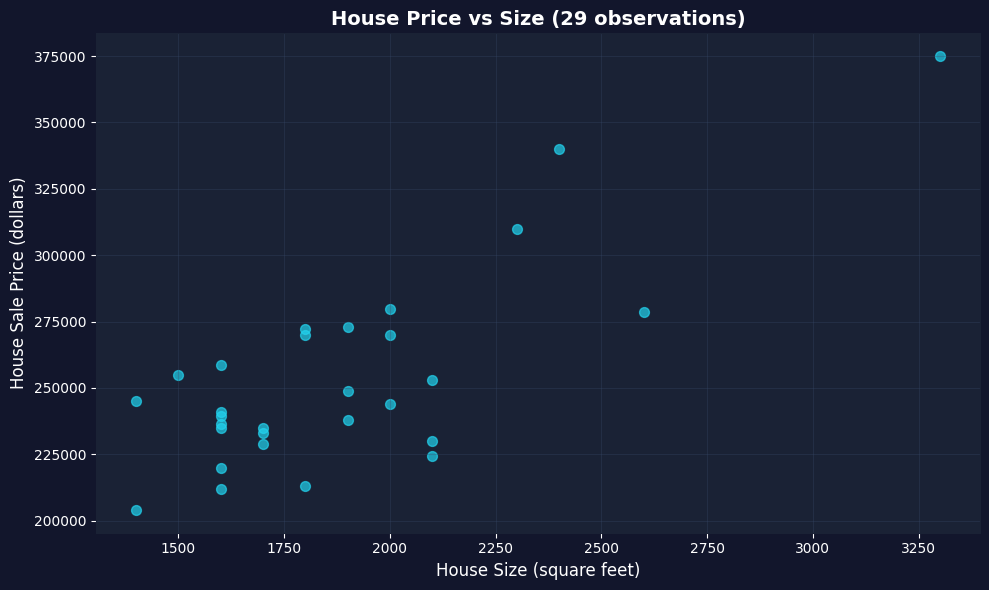


What do you see?
- Positive relationship: Larger houses tend to have higher prices
- Roughly linear: The points follow an upward-sloping pattern
- Some scatter: Not all points lie exactly on a line (this is the 'error')


In [5]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
ax.scatter(data_house['size'], data_house['price'],
           color='#22d3ee', s=50, alpha=0.7)

# Labels and formatting
ax.set_xlabel('House Size (square feet)', fontsize=12)
ax.set_ylabel('House Sale Price (dollars)', fontsize=12)
ax.set_title('House Price vs Size (29 observations)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWhat do you see?")
print("- Positive relationship: Larger houses tend to have higher prices")
print("- Roughly linear: The points follow an upward-sloping pattern")
print("- Some scatter: Not all points lie exactly on a line (this is the 'error')")


**Transition:** Having visualized a clear positive relationship between house size and price, we're ready to quantify this relationship precisely using regression analysis.



> **Key Concept 1.3: Visual Exploration Before Regression**
>
> Always plot your data before running a regression. Scatter plots reveal the direction, strength, and form of relationships between variables, and can expose outliers or nonlinearities that summary statistics alone would miss. Visual exploration is the essential first step in any empirical analysis.

## 1.6 Fitting a Regression Line

Now we'll fit an **Ordinary Least Squares (OLS)** regression line to these data. OLS chooses the intercept ($\beta_0$) and slope ($\beta_1$) that **minimize the sum of squared residuals**:

$$\min_{\beta_0, \beta_1} \sum_{i=1}^{n} (\text{price}_i - \beta_0 - \beta_1 \times \text{size}_i)^2$$

In other words, we're finding the line that makes our prediction errors as small as possible (in a squared sense).

We'll use Python's `statsmodels` package, which provides regression output similar to Stata and R.


> **Key Concept 1.4: Introduction to Regression Analysis**
>
> Regression analysis quantifies the relationship between variables. In a bivariate regression, the slope coefficient tells us how much the outcome variable ($y$) changes when the explanatory variable ($x$) increases by one unit.



In [6]:
# Fit OLS regression: price ~ size
# The formula syntax is: 'dependent_variable ~ independent_variable'
model = ols('price ~ size', data=data_house).fit()

# Display the full regression output
print("=" * 70)
print("OLS REGRESSION RESULTS: price ~ size")
print("=" * 70)
print(model.summary())

OLS REGRESSION RESULTS: price ~ size
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           4.41e-07
Time:                        21:50:24   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.

## 1.7 Interpreting the Results

The regression output contains a lot of information! Let's break down the most important parts:

### Key Statistics to Focus On:

1. **Coefficients table** (middle section):
   - **Intercept**: The predicted price when size = 0 (often not economically meaningful)
   - **size**: The slope coefficient - our main interest!
   - **std err**: Standard error (measures precision of the estimate)
   - **t**: t-statistic (coefficient / standard error)
   - **P>|t|**: p-value (tests if coefficient is significantly different from zero)

2. **R-squared** (top right section):
   - Proportion of variation in Y explained by X
   - Ranges from 0 to 1 (higher = better fit)

3. **F-statistic** (top right section):
   - Tests overall significance of the regression
   - Low p-value (Prob F-statistic) means the model is statistically significant

Let's extract and interpret the key coefficients.

In [7]:
# Extract key statistics
intercept = model.params['Intercept']
slope     = model.params['size']
r_squared = model.rsquared
n_obs     = int(model.nobs)

print("=" * 70)
print("KEY REGRESSION COEFFICIENTS")
print("=" * 70)
print(f"Intercept (β₀): ${intercept:,.2f}")
print(f"Slope (β₁):  ${slope:,.2f}")
print(f"R-squared: {r_squared:.4f} ({r_squared*100:.2f}%)")
print(f"Number of observations: {n_obs}")

print("\n" + "=" * 70)
print("ECONOMIC INTERPRETATION")
print("=" * 70)
print(f"📌 For every additional square foot of house size,")
print(f"   the sale price increases by approximately ${slope:,.2f}")
print(f"\n📌 The model explains {r_squared*100:.2f}% of the variation in house prices")
print(f"\n📌 The remaining {(1-r_squared)*100:.2f}% is due to other factors not included")
print(f"   (e.g., location, age, condition, neighborhood quality)")

KEY REGRESSION COEFFICIENTS
Intercept (β₀): $115,017.28
Slope (β₁):  $73.77
R-squared: 0.6175 (61.75%)
Number of observations: 29

ECONOMIC INTERPRETATION
📌 For every additional square foot of house size,
   the sale price increases by approximately $73.77

📌 The model explains 61.75% of the variation in house prices

📌 The remaining 38.25% is due to other factors not included
   (e.g., location, age, condition, neighborhood quality)


> **Key Concept 1.5: Reading Regression Output**
>
> The key elements of regression output are: the coefficient estimate (magnitude and direction of the relationship), the standard error (precision of the estimate), the t-statistic and p-value (statistical significance), and R-squared (proportion of variation explained). Together, these tell us whether the relationship is economically meaningful and statistically reliable.

## 1.8 Visualizing the Fitted Line

The **fitted regression line** represents our model's predictions. For any given house size, the line shows the predicted price according to our equation:

$$\hat{\text{price}} = \beta_0 + \beta_1 \times \text{size}$$

Let's overlay this fitted line on our scatter plot to see how well it captures the relationship.

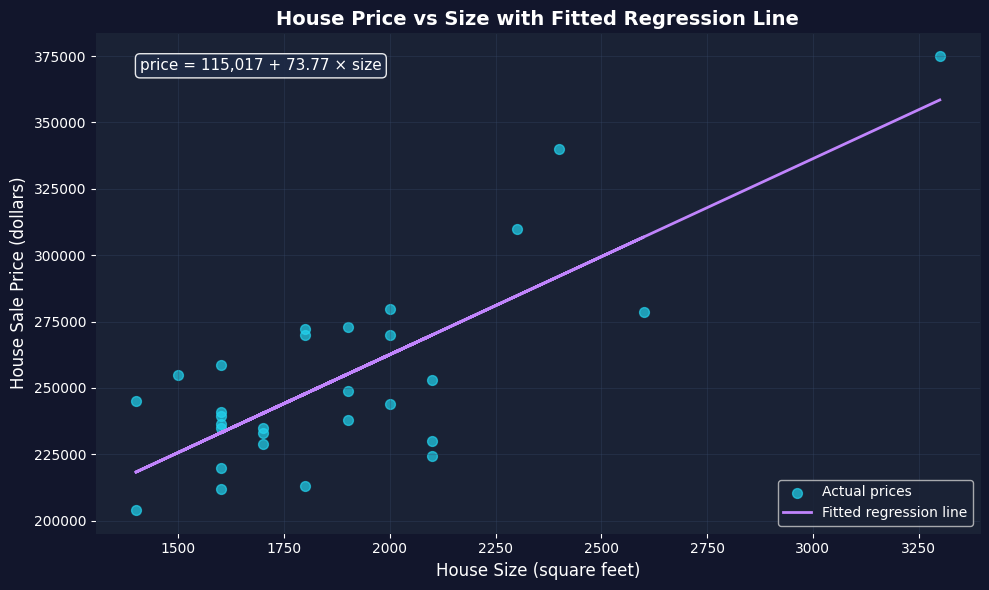


📊 The purple line is our 'line of best fit'
   It minimizes the sum of squared vertical distances from each point


In [8]:
# Create scatter plot with fitted regression line
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual data points
ax.scatter(data_house['size'], data_house['price'],
           color='#22d3ee', s=50, label='Actual prices', alpha=0.7)

# Plot fitted regression line
ax.plot(data_house['size'], model.fittedvalues,
        color='#c084fc', linewidth=2, label='Fitted regression line')

# Add equation to plot
equation_text = f'price = {intercept:,.0f} + {slope:.2f} × size'
ax.text(0.05, 0.95, equation_text,
        transform=ax.transAxes, fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#1e2a45', alpha=0.9))

# Labels and formatting
ax.set_xlabel('House Size (square feet)', fontsize=12)
ax.set_ylabel('House Sale Price (dollars)', fontsize=12)
ax.set_title('House Price vs Size with Fitted Regression Line',
             fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The purple line is our 'line of best fit'")
print("   It minimizes the sum of squared vertical distances from each point")


**Transition:** Statistical output is only meaningful when translated into economic insights. Let's explore what our regression coefficients tell us about housing markets and the limitations of our analysis.



*Having fitted and visualized our regression model, let's now interpret what these results mean in economic terms.*

## 1.9 Economic Interpretation and Examples

Now that we've estimated the regression, let's think about what it means in economic terms.

### Practical Implications:

Our estimated slope of approximately **\$74 per square foot** means:

- A house that's 100 sq ft larger is predicted to sell for \$74 × 100 = \$7,400 more
- A house that's 500 sq ft larger is predicted to sell for \$74 × 500 = \$37,000 more

### Making Predictions:

We can use our regression equation to predict prices for houses of different sizes. For example, for a 2,000 sq ft house:

$$\hat{\text{price}} = 115,952 + 74.03 \times 2000 = \$264,012$$

### Important Caveats:

1. **This is association, not causation**: We can't conclude that adding square footage to a house will increase its value by \$74/sq ft. Other factors (like quality of construction) might be correlated with size.

2. **Omitted variables**: Many other factors affect house prices (location, age, condition, amenities). Our simple model ignores these - we'll learn how to include them in later chapters.

3. **Sample-specific**: These results are from 29 houses in Davis, CA in 1999. The relationship might differ in other locations or time periods.

4. **Don't extrapolate too far**: Our data ranges from 1,400 to 3,300 sq ft. Predictions far outside this range (e.g., for a 10,000 sq ft house) may not be reliable.


> **Key Concept 1.6: Interpreting Regression Results**
>
> Regression results must be interpreted with caution. Association does not imply causation, omitted variables can bias estimates, and predictions should not extrapolate beyond the range of the data.



## Key Takeaways

**Statistical Methods and Data Types:**

- Econometrics uses two main approaches: descriptive analysis (summarizing data) and statistical inference (drawing population conclusions from samples)
- Economic data are primarily continuous and numerical, though categorical and discrete data are also important
- Economics relies mainly on observational data, making causal inference more challenging than with experimental data
- The three data collection methods are cross-section (individuals at one time), time series (one individual over time), and panel data (individuals over time)
- Each data type requires different considerations for statistical inference, particularly when computing standard errors
- This textbook focuses on continuous numerical data and cross-section analysis as the foundation for more advanced methods

**Regression Analysis and Interpretation:**

- Regression analysis is the primary tool in econometrics, quantifying how outcome variables (y) vary with explanatory variables (x)
- The simple linear regression model has the form: $y = \beta_0 + \beta_1 x + \varepsilon$, where $\beta_0$ is the intercept and $\beta_1$ is the slope
- The slope coefficient measures association: how much y changes when x increases by one unit
- OLS (Ordinary Least Squares) finds the best-fitting line by minimizing the sum of squared prediction errors
- R-squared measures the proportion of variation in y explained by x, ranging from 0 to 1 (higher = better fit)
- Economic interpretation focuses on magnitude (size of effect), statistical significance, and practical importance

**Practical Application:**

- Our house price example: Each additional square foot is associated with a \$73.77 increase in price (R² = 61.75%)
- Visualization is essential: scatter plots reveal the nature of relationships before fitting regression models
- Regression shows association, not causation—omitted variables and confounding factors require careful consideration
- Predictions should not extrapolate beyond the range of observed data
- Sample-specific results may not generalize to other locations, time periods, or populations

**Python Tools and Workflow:**

- `pandas` handles data loading, manipulation, and descriptive statistics
- `statsmodels.formula.api.ols()` estimates OLS regression models with R-style formula syntax
- `matplotlib` creates publication-quality scatter plots and visualizations
- Standard workflow: load data → explore descriptively → visualize → model → interpret → validate
- Random seeds ensure reproducibility of results across different runs

**Prerequisites and Mathematical Background:**

- Summation notation (Σ) expresses formulas concisely and appears throughout econometrics
- Calculus concepts (derivatives, rates of change) help understand marginal effects but are not essential
- Expected values (E[X]) define population parameters like means and variances
- "Learning-by-doing" is the most effective approach: practice with real data and software is essential for mastery

---

**Next Steps:**

- **Chapter 2**: Univariate data summary (describing single variables)
- **Chapter 3**: The sample mean and sampling distributions
- **Chapter 4**: Statistical inference for the mean (confidence intervals, hypothesis tests)
- **Chapters 5-7**: Deep dive into bivariate regression (extending what we learned here)

**You have now mastered:**
 Loading and exploring economic data in Python
 Creating scatter plots to visualize relationships
 Estimating simple linear regression models with OLS
 Interpreting regression coefficients economically
 Understanding the limitations of regression analysis

These foundational concepts are the building blocks for all of econometrics. Everything that follows builds on this introduction!


## Practice Exercises

Test your understanding of regression analysis with these exercises:

**Exercise 1:** Conceptual understanding

- (a) What is the difference between descriptive analysis and statistical inference?
- (b) Why do economists primarily use observational data rather than experimental data?
- (c) Name the three main types of data collection methods and give an example of each.

**Exercise 2:** Data types

- Classify each of the following as continuous numerical, discrete numerical, or categorical:
  - (a) Annual household income
  - (b) Number of children in a family
  - (c) Employment status (employed, unemployed, not in labor force)
  - (d) Temperature in degrees Celsius

**Exercise 3:** Regression interpretation

- Suppose you estimate: earnings = 20,000 + 5,000 × education
  - (a) Interpret the intercept coefficient
  - (b) Interpret the slope coefficient
  - (c) Predict earnings for someone with 16 years of education
  - (d) What is the predicted difference in earnings between someone with 12 vs. 16 years of education?

**Exercise 4:** Using our house price model

- Using the regression equation: price = 115,017 + 73.77 × size
  - (a) Predict the price for a 1,800 sq ft house
  - (b) Predict the price for a 2,500 sq ft house
  - (c) What is the predicted price difference between these two houses?
  - (d) Is the intercept economically meaningful in this context? Why or why not?

**Exercise 5:** Critical thinking about causation

- Our regression shows larger houses have higher prices. Does this mean:
  - (a) Adding square footage to a house will increase its value by $73.77 per sq ft?
  - (b) What other factors might be correlated with both house size and price?
  - (c) How would you design a study to establish a causal relationship?

**Exercise 6:** R-squared interpretation

- Our model has R² = 0.6175 (61.75%)
  - (a) What does this number tell us about our model?
  - (b) What factors might explain the remaining 38.25% of variation in prices?
  - (c) Would R² = 1.0 be realistic for real-world economic data? Why or why not?

**Exercise 7:** Summation notation

- Calculate: $\sum_{i=1}^{4} (3 + 2i)$
- Show all steps in your calculation

**Exercise 8:** Python practice

- Load the house dataset and:
  - (a) Calculate the correlation between price and bedrooms
  - (b) Create a scatter plot of price vs. bedrooms
  - (c) Estimate the regression: price ~ bedrooms
  - (d) Compare the R² to our size regression. Which predictor is better?

---



## Case Studies

Now let's apply what you've learned to real economic research! In this section, you'll explore data from actual published studies, using the same tools and techniques from this chapter.

**Why case studies matter:**

- See how regression analysis is used in real research
- Practice applying Chapter 1 tools to authentic data
- Develop intuition for economic relationships
- Bridge the gap between textbook examples and research practice

### Case Study 1: Economic Convergence Clubs

**Research Question**: Do countries converge toward similar levels of economic development, or do they form distinct "convergence clubs" with different trajectories?

**Background**: Traditional economic theory suggests that poor countries should grow faster than rich countries, eventually "catching up" in terms of income and productivity. This is called the convergence hypothesis. However, empirical evidence shows a more complex picture: countries may form distinct groups (clubs) that converge toward different long-run equilibrium levels rather than a single global level.

**This Research** ([Mendez, 2020](https://github.com/quarcs-lab/mendez2020-convergence-clubs-code-data)): Uses modern econometric methods to identify convergence clubs in labor productivity across countries. The analysis examines whether countries follow one common development path or multiple distinct paths, and what factors (capital accumulation, technology, institutions) drive these patterns.

**The Data**: Panel dataset tracking multiple countries over several years, with 26 variables including:

- **Output measures**: GDP, GDP per capita
- **Productivity**: Labor productivity, total factor productivity (TFP)
- **Capital**: Physical capital stock, capital per worker
- **Human capital**: Years of schooling, human capital index
- **Classifications**: Country codes, regions, income groups

**Your Task**: Use the descriptive analysis and regression tools from Chapter 1 to explore patterns in the convergence clubs data. You'll investigate productivity gaps, visualize relationships, and begin to understand why some countries develop differently than others.

> **Key Concept 1.7: Economic Convergence and Productivity Drivers**
>
> **Beta convergence** refers to the hypothesis that poor countries will grow faster than rich countries, eventually "catching up" in terms of income and productivity. However, evidence suggests countries may form distinct **convergence clubs**—groups that converge toward different long-run equilibrium levels rather than a single global level.
>
> Labor productivity (output per worker) depends on **capital accumulation** (capital per worker) and **aggregate efficiency** (total factor productivity or TFP). The regression of productivity on capital captures this association, allowing us to quantify how much of cross-country productivity differences are explained by capital versus efficiency factors.



#### Load the Convergence Clubs Data

Let's load two datasets:

1. **Main dataset** (`dat.csv`): Country-year panel data with economic variables
2. **Data dictionary** (`dat-definitions.csv`): Explains what each variable means

The data uses a **multi-index** structure with (country, year) pairs, allowing us to track each country over time.

In [9]:
# Import data with sorted multi-index
df1 = pd.read_csv(
    "https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat.csv",
    index_col=["country", "year"]
).sort_index()

# Import data dictionary
df2 = pd.read_csv(
    "https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat-definitions.csv"
)

# Display basic information
print("=" * 70)
print("CONVERGENCE CLUBS DATASET")
print("=" * 70)
print(f"Dataset shape: {df1.shape[0]} observations (country-year pairs), {df1.shape[1]} variables")
print(f"\nCountries: {len(df1.index.get_level_values('country').unique())} unique countries")
print(f"Years: {df1.index.get_level_values('year').min()} to {df1.index.get_level_values('year').max()}")

print("\n" + "=" * 70)
print("FIRST 5 OBSERVATIONS")
print("=" * 70)
print(df1.head(5))

CONVERGENCE CLUBS DATASET
Dataset shape: 2700 observations (country-year pairs), 27 variables

Countries: 108 unique countries
Years: 1990 to 2014

FIRST 5 OBSERVATIONS
              id          Y      K       pop         L         s  alpha_it  \
country year                                                                 
Albania 1990   1  12449.999  31217  3.281453  1.250096  8.497386       NaN   
        1991   1  11310.000  30082  3.275438  1.243719  8.442703       NaN   
        1992   1  10122.000  28968  3.240613  0.993492  8.388020       NaN   
        1993   1  11636.000  29010  3.189623  0.935928  8.333337       NaN   
        1994   1  13120.000  29634  3.140634  1.008687  8.278653       NaN   

                  GDPpc          lp         h  ...  log_h_raw  log_tfp_raw  \
country year                                   ...                           
Albania 1990  3794.0508   9959.2344  3.165140  ...   1.152197     5.560511   
        1991  3452.9731   9093.6943  3.150347  ...

In [10]:
print("\n" + "=" * 75)
print("VARIABLE DEFINITIONS")
print("=" * 75)
print(df2)


VARIABLE DEFINITIONS
         var_name                                            var_def     type
0         country               Standardized country name (from PWT)    cs_id
1            year                                               Year    ts_id
2               Y                                                GDP  numeric
3               K                                   Physical Capital  numeric
4             pop                                         Population  numeric
5               L                                        Labor Force  numeric
6               s                                 Years of Schooling  numeric
7        alpha_it                             Variable Capital Share  numeric
8           GDPpc                                     GDP per capita  numeric
9              lp                                 Labor Productivity  numeric
10              h                                Human Capital Index  numeric
11             kl                         

#### Task 1: Data Exploration (Guided)

**Objective**: Understand the dataset structure and available variables.

**Instructions**:

1. Examine the output above to understand the multi-index (country, year) structure
2. Review the data dictionary to identify key productivity variables
3. Check for missing values in key variables
4. Identify the variable names you'll use for subsequent analyses

**Key variables to focus on** (check exact names in the data dictionary):

- Labor productivity variables
- Capital per worker variables
- GDP per capita measures
- Country classification variables (region, income group)

Run the code above and study the output. What patterns do you notice? How many time periods does each country have?

In [11]:
# Your code here: Explore the dataset structure
#
# Suggested explorations:
# 1. Check column names: df1.columns.tolist()
# 2. Check for missing values: df1.isnull().sum()
# 3. Examine a specific country's data
# 4. Count observations per country

# Example: Examine USA's data
# df1.loc['USA']

#### Task 2: Descriptive Statistics (Semi-guided)

**Objective**: Generate summary statistics for key productivity variables.

**Instructions**:

1. Select 3-4 key variables related to productivity and capital
2. Generate descriptive statistics (mean, median, std, min, max)
3. Identify countries with highest and lowest productivity levels
4. Calculate the productivity gap between top and bottom performers

**Apply what you learned in sections 1.4**: Use `.describe()` method like we did with the house price data.

**Hint**: You'll need to identify the exact variable names from the data dictionary. Look for variables measuring labor productivity, GDP per capita, or capital per worker.

In [12]:
# Your code here: Generate descriptive statistics
#
# Steps:
# 1. Identify variable names from data dictionary (check df2)
# 2. Select key variables from df1
# 3. Generate summary statistics using .describe()
# 4. Find countries with max/min values using .idxmax() and .idxmin()
# 5. Calculate gaps between high and low performers

# Example structure:
# key_vars = ['variable1', 'variable2', 'variable3']  # Replace with actual names
# df1[key_vars].describe()

> **Key Concept 1.8: Panel Data Structure**
>
> Panel data combines cross-section and time series dimensions, tracking multiple entities (countries) over multiple time periods (years). This structure allows us to study both differences between countries (cross-sectional variation) and changes within countries over time (time series variation). The data is indexed by (country, year) pairs.

#### Task 3: Visualizing Productivity Patterns (Semi-guided)

**Objective**: Create scatter plots to visualize productivity relationships.

**Instructions**:

1. Create a scatter plot comparing two productivity-related variables
2. Add appropriate axis labels and a descriptive title
3. Optionally: Color-code points by region or income group
4. Interpret the pattern you observe

**Apply what you learned in section 1.5**: Use matplotlib to create scatter plots like the house price visualization.

**Suggested relationships to explore**:

- GDP per capita vs. labor productivity
- Capital per worker vs. labor productivity
- Human capital vs. GDP per capita

In [13]:
# Your code here: Create scatter plot
#
# Steps:
# 1. Prepare data (select variables, remove missing values)
# 2. Create figure and axis: fig, ax = plt.subplots(figsize=(10, 6))
# 3. Create scatter plot: ax.scatter(x, y, ...)
# 4. Add labels, title, and formatting
# 5. Display and interpret

# Example structure:
# plot_data = df1[['var_x', 'var_y']].dropna()
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(plot_data['var_x'], plot_data['var_y'], alpha=0.6)
# ax.set_xlabel('Variable X')
# ax.set_ylabel('Variable Y')
# plt.show()

# What pattern do you observe? Positive or negative relationship?

#### Task 4: Time Series Exploration (More Independent)

**Objective**: Examine productivity trends over time for specific countries.

**Instructions**:

1. Select 2-3 countries of interest (e.g., USA, China, India, Japan, or countries from your region)
2. Plot labor productivity over time for each country
3. Compare their trajectories: Which countries are growing faster?
4. Calculate the average annual growth rate (optional: percentage change per year)

**Hint**: Remember that panel data is indexed by (country, year). Use `.loc[country]` to filter data for a specific country.

**Questions to answer**:

- Are productivity levels converging (getting closer) or diverging (spreading apart)?
- Which country experienced the fastest productivity growth?
- Do you see evidence of convergence clubs (groups following similar paths)?

In [14]:
# Your code here: Time series plots
#
# Steps:
# 1. Select countries (e.g., countries = ['USA', 'CHN', 'JPN'])
# 2. For each country, extract time series data
# 3. Create line plot over time
# 4. Compare trajectories

# Example structure:
# countries = ['USA', 'CHN', 'IND']  # Adjust based on actual country codes
# fig, ax = plt.subplots(figsize=(10, 6))
#
# for country in countries:
#     country_data = df1.loc[country]
#     ax.plot(country_data.index, country_data['productivity_var'], label=country)
#
# ax.set_xlabel('Year')
# ax.set_ylabel('Labor Productivity')
# ax.legend()
# plt.show()

#### Task 5: Simple Regression Analysis (INDEPENDENT)

**Objective**: Estimate the relationship between capital and productivity.

**Research Question**: Does higher capital per worker lead to higher labor productivity?

**Instructions**:

1. Prepare regression data (select variables, remove missing values)
2. Estimate OLS regression: `labor_productivity ~ capital_per_worker`
3. Display the regression summary
4. Interpret the slope coefficient economically
5. Report the R-squared value
6. **Critical thinking**: Discuss whether this is association or causation

**Apply what you learned in sections 1.6-1.7**: Use `ols()` from statsmodels and interpret coefficients.

**Important questions**:

- What does the slope coefficient tell us?
- Could there be omitted variables affecting both capital and productivity?
- Could reverse causality be a concern (does higher productivity lead to more capital accumulation)?

In [15]:
# Your code here: Regression analysis
#
# Steps:
# 1. Prepare data: reg_data = df1[['productivity_var', 'capital_var']].dropna()
# 2. Reset index if needed: reg_data = reg_data.reset_index()
# 3. Estimate regression: model = ols('productivity_var ~ capital_var', data=reg_data).fit()
# 4. Display summary: print(model.summary())
# 5. Extract and interpret coefficients

# Example structure:
# from statsmodels.formula.api import ols
#
# reg_data = df1[['var_y', 'var_x']].dropna().reset_index()
# model = ols('var_y ~ var_x', data=reg_data).fit()
# print(model.summary())
#
# Interpretation:
# Slope = ___: For every unit increase in capital per worker, 
#               labor productivity increases by ___ units
# R² = ___: Capital explains ___% of variation in productivity

#### Task 6: Comparative Analysis (Independent)

**Objective**: Compare productivity patterns between country groups.

**Research Question**: Does the capital-productivity relationship differ between high-income and developing countries?

**Instructions**:

1. If the data has an income group variable, group countries by income level
2. Calculate average productivity and capital for each group
3. Create comparative scatter plots (one color per group)
4. (Advanced) Run separate regressions for each group
5. Compare the slope coefficients: Is the relationship stronger in one group?

**This extends Chapter 1 concepts**: You're using grouping and comparative analysis to see if relationships vary across subsamples.

**Questions to explore**:

- Do high-income countries have uniformly higher productivity?
- Is the capital-productivity relationship steeper in developing countries?
- What might explain differences between groups?

In [16]:
# Your code here: Comparative analysis
#
# Steps:
# 1. Identify grouping variable (income level, region, etc.)
# 2. Group data: df1.groupby('group_var').mean()
# 3. Create comparative visualizations
# 4. Run regressions by group (optional)

# Example structure for comparative scatter plot:
# fig, ax = plt.subplots(figsize=(10, 6))
#
# for group in df1['group_var'].unique():
#     group_data = df1[df1['group_var'] == group]
#     ax.scatter(group_data['var_x'], group_data['var_y'], label=group, alpha=0.6)
#
# ax.set_xlabel('Capital per Worker')
# ax.set_ylabel('Labor Productivity')
# ax.legend()
# plt.show()

# Advanced: Separate regressions
# for group in groups:
#     group_data = df1[df1['group_var'] == group].dropna()
#     model = ols('var_y ~ var_x', data=group_data).fit()
#     print(f"\n{group}: Slope = {model.params['var_x']:.4f}, R² = {model.rsquared:.4f}")

#### What You've Learned from This Case Study

Through this hands-on exploration of economic convergence data, you've applied all the core Chapter 1 tools:

- **Data loading and exploration**: Worked with real panel data from research
- **Descriptive statistics**: Summarized productivity patterns across countries
- **Visualization**: Created scatter plots and time series to reveal relationships
- **Regression analysis**: Quantified the capital-productivity relationship
- **Critical thinking**: Distinguished association from causation
- **Comparative analysis**: Explored differences between country groups

**Connection to the research**: The patterns you've discovered—productivity gaps, the role of capital, differences between country groups—are the empirical motivation for the convergence clubs analysis in Mendez (2020). The full research uses advanced methods (covered in later chapters) to formally identify clubs and test convergence hypotheses.

**Looking ahead**:

- **Chapter 2** will teach you more sophisticated descriptive analysis for univariate data
- **Chapter 3-4** cover statistical inference, allowing you to test hypotheses formally
- **Chapter 5-9** extend regression analysis to multiple predictors and transformations
- **Chapter 10-17** introduce advanced methods like panel data regression—perfect for convergence clubs!

---

**Great work!** You've completed Chapter 1 and applied your new skills to real economic research. Continue to Chapter 2 to learn more about data summary and distributions.


### Case Study 2: Can Satellites See Poverty? Predicting Local Development in Bolivia

**Research Question**: Can satellite data—nighttime lights and satellite image embeddings—predict local economic development across Bolivia's municipalities?

**Background**: Monitoring progress toward the United Nations Sustainable Development Goals (SDGs) requires timely, granular data on economic conditions. However, many developing countries lack comprehensive municipality-level statistics. Recent advances in remote sensing and machine learning offer a promising alternative: using satellite data to *predict* local development outcomes.

Two types of satellite data have proven particularly useful:

1. **Nighttime lights (NTL)**: Satellite images of Earth at night reveal the intensity of artificial lighting. Brighter areas typically correspond to greater economic activity, electrification, and urbanization. NTL data is available globally and annually, making it a powerful proxy for economic development in data-scarce regions ([Henderson et al., 2012](https://doi.org/10.1257/aer.102.2.994)).

2. **Satellite image embeddings**: Deep learning models trained on daytime satellite imagery (Sentinel-2, Landsat) can extract 64-dimensional feature vectors that capture visual patterns—road networks, building density, vegetation cover, agricultural activity—without requiring manual labeling. These abstract features often correlate strongly with socioeconomic outcomes ([Jean et al., 2016](https://doi.org/10.1126/science.aaf7894)).

**This Research** ([DS4Bolivia Project](https://github.com/quarcs-lab/ds4bolivia)): A comprehensive data science initiative that integrates satellite data with Bolivia's Municipal SDG Atlas ([Andersen et al., 2020](https://atlas.sdsnbolivia.org)) to study geospatial development patterns across all **339 municipalities**. The project demonstrates how machine learning models can predict SDG indicators from satellite features, achieving meaningful predictive accuracy for poverty and energy access indicators.

**The Data**: Cross-sectional dataset covering 339 Bolivian municipalities with over 350 variables, including:

- **Development outcomes**: Municipal Sustainable Development Index (IMDS, 0-100 composite), individual SDG indices (SDG 1-17)
- **Satellite data**: Log nighttime lights per capita (2012-2020), 64 satellite embedding dimensions (2017)
- **Demographics**: Population (2001-2020), municipality and department names
- **Socioeconomic indicators**: Unsatisfied basic needs, literacy rates, electricity coverage, health outcomes

**Your Task**: Use the descriptive analysis and regression tools from Chapter 1 to explore the DS4Bolivia dataset. You'll investigate whether nighttime lights predict municipal development, visualize satellite-development relationships, and begin to assess how useful remote sensing data is for SDG monitoring. This case study introduces a dataset that we will revisit throughout the textbook, applying increasingly sophisticated econometric methods in each chapter.

> **Key Concept 1.9: Satellite Data as Economic Proxy**
>
> **Nighttime lights (NTL)** captured by satellites measure the intensity of artificial illumination on Earth's surface. Because lighting requires electricity and economic activity, NTL intensity strongly correlates with GDP, income levels, and urbanization. The log of NTL per capita transforms the highly skewed raw luminosity into a more symmetric variable suitable for regression analysis.
>
> **Satellite embeddings** are 64-dimensional feature vectors extracted by deep learning models from daytime satellite imagery. Each dimension captures abstract visual patterns (building density, road networks, vegetation) that correlate with socioeconomic conditions. Together, NTL and embeddings provide complementary information: NTL captures *nighttime economic activity* while embeddings capture *daytime physical infrastructure*.

#### Load the DS4Bolivia Data

Let's load the comprehensive DS4Bolivia dataset directly from GitHub. This dataset integrates satellite data, SDG indicators, and demographic information for all 339 Bolivian municipalities.

In [17]:
# Load the DS4Bolivia dataset
url_bol = "https://raw.githubusercontent.com/quarcs-lab/ds4bolivia/master/ds4bolivia_v20250523.csv"
bol = pd.read_csv(url_bol)

# Display basic information
print("=" * 70)
print("DS4BOLIVIA DATASET")
print("=" * 70)
print(f"Dataset shape: {bol.shape[0]} municipalities, {bol.shape[1]} variables")
print(f"\nDepartments: {bol['dep'].nunique()} unique departments")
print(f"Department names: {sorted(bol['dep'].unique())}")

# Select key variables for this case study
key_vars = ['mun', 'dep', 'imds', 'ln_NTLpc2017', 'pop2017',
            'index_sdg1', 'index_sdg4', 'index_sdg8', 'sdg1_1_ubn']
bol_key = bol[key_vars].copy()

print(f"\nKey variables selected: {len(key_vars)}")
print("\n" + "=" * 70)
print("FIRST 10 MUNICIPALITIES")
print("=" * 70)
print(bol_key.head(10))

DS4BOLIVIA DATASET
Dataset shape: 339 municipalities, 351 variables

Departments: 9 unique departments
Department names: ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosí', 'Santa Cruz', 'Tarija']

Key variables selected: 9

FIRST 10 MUNICIPALITIES
               mun         dep       imds  ln_NTLpc2017      pop2017  \
0        Esmeralda       Oruro  53.200001     13.647187   4065.64790   
1        Quillacas       Oruro  50.500000     13.821883   4517.64500   
2   Pampa Aullagas       Oruro  47.299999     13.406137   2951.34470   
3        Llallagua      Potosí  58.099998     14.827301  43508.59400   
4         Caripuyo      Potosí  43.500000     12.510039   9163.95310   
5          Aiquile  Cochabamba  50.400002     14.606511  22833.01600   
6  Villa de Sacaca      Potosí  42.200001     12.586779  20121.35500   
7           Acasio      Potosí  42.099998     12.358384   6426.26170   
8          Huanuni       Oruro  56.799999     14.774255  27025.19900   
9      H

In [18]:
# Variable descriptions for this case study
print("=" * 70)
print("KEY VARIABLE DESCRIPTIONS")
print("=" * 70)
descriptions = {
    'mun': 'Municipality name',
    'dep': 'Department (administrative region, 9 total)',
    'imds': 'Municipal Sustainable Development Index (0-100, composite of all SDGs)',
    'ln_NTLpc2017': 'Log of nighttime lights per capita (2017, satellite-based)',
    'pop2017': 'Population in 2017',
    'index_sdg1': 'SDG 1 Index: No Poverty (0-100)',
    'index_sdg4': 'SDG 4 Index: Quality Education (0-100)',
    'index_sdg8': 'SDG 8 Index: Decent Work and Economic Growth (0-100)',
    'sdg1_1_ubn': 'Unsatisfied Basic Needs (% of population, 2012)',
}
for var, desc in descriptions.items():
    print(f"  {var:20s} — {desc}")

KEY VARIABLE DESCRIPTIONS
  mun                  — Municipality name
  dep                  — Department (administrative region, 9 total)
  imds                 — Municipal Sustainable Development Index (0-100, composite of all SDGs)
  ln_NTLpc2017         — Log of nighttime lights per capita (2017, satellite-based)
  pop2017              — Population in 2017
  index_sdg1           — SDG 1 Index: No Poverty (0-100)
  index_sdg4           — SDG 4 Index: Quality Education (0-100)
  index_sdg8           — SDG 8 Index: Decent Work and Economic Growth (0-100)
  sdg1_1_ubn           — Unsatisfied Basic Needs (% of population, 2012)


#### Task 1: Data Exploration (Guided)

**Objective**: Understand the DS4Bolivia dataset structure and key variables.

**Instructions**:

1. Examine the output above: How many municipalities? How many departments?
2. Check for missing values in the key variables
3. Identify the range of the IMDS index (development measure)
4. Explore the distribution of departments (how many municipalities per department?)

**Key variables to focus on**:

- `imds`: Overall development index (our main dependent variable)
- `ln_NTLpc2017`: Log nighttime lights per capita (our main predictor)
- `dep`: Department (for regional comparisons)
- `pop2017`: Population (for context)

Run the code below to explore the data structure.

In [19]:
# Your code here: Explore the DS4Bolivia dataset
#
# Suggested explorations:
# 1. Check for missing values: bol_key.isnull().sum()
# 2. Municipalities per department: bol_key['dep'].value_counts()
# 3. Range of IMDS: bol_key['imds'].describe()
# 4. Largest/smallest municipalities: bol_key.nlargest(5, 'pop2017')

# Example: Check missing values
print("Missing values per variable:")
print(bol_key.isnull().sum())
print(f"\nTotal municipalities: {len(bol_key)}")
print(f"Complete cases (no missing in key vars): {bol_key.dropna().shape[0]}")

Missing values per variable:
mun             0
dep             0
imds            0
ln_NTLpc2017    6
pop2017         0
index_sdg1      0
index_sdg4      0
index_sdg8      0
sdg1_1_ubn      0
dtype: int64

Total municipalities: 339
Complete cases (no missing in key vars): 333


#### Task 2: Descriptive Statistics (Guided)

**Objective**: Generate summary statistics for key development and satellite variables.

**Instructions**:

1. Calculate descriptive statistics for `imds`, `ln_NTLpc2017`, and `pop2017`
2. Identify the municipality with the highest and lowest IMDS
3. Compare average IMDS across departments
4. Discuss what the summary statistics reveal about inequality across municipalities

**Apply what you learned in section 1.4**: Use `.describe()` and `.groupby()` methods like we did with the house price data.

In [20]:
# Your code here: Descriptive statistics for DS4Bolivia
#
# Steps:
# 1. Summary statistics for key variables
# 2. Identify top/bottom municipalities
# 3. Compare departments

# Example: Summary statistics
print("=" * 70)
print("DESCRIPTIVE STATISTICS: KEY VARIABLES")
print("=" * 70)
print(bol_key[['imds', 'ln_NTLpc2017', 'pop2017', 'sdg1_1_ubn']].describe().round(2))

# Top and bottom municipalities by IMDS
print("\n" + "=" * 70)
print("TOP 5 MUNICIPALITIES BY DEVELOPMENT (IMDS)")
print("=" * 70)
print(bol_key.nlargest(5, 'imds')[['mun', 'dep', 'imds', 'ln_NTLpc2017']].to_string(index=False))

print("\n" + "=" * 70)
print("BOTTOM 5 MUNICIPALITIES BY DEVELOPMENT (IMDS)")
print("=" * 70)
print(bol_key.nsmallest(5, 'imds')[['mun', 'dep', 'imds', 'ln_NTLpc2017']].to_string(index=False))

DESCRIPTIVE STATISTICS: KEY VARIABLES
         imds  ln_NTLpc2017     pop2017  sdg1_1_ubn
count  339.00        333.00      339.00      339.00
mean    51.05         13.88    32858.76       70.36
std      6.77          1.18   117649.33       18.95
min     35.70          9.06      661.82       14.30
25%     47.00         13.13     6425.71       59.65
50%     50.50         13.91    11627.51       73.60
75%     54.85         14.77    22497.26       85.85
max     80.20         17.06  1604457.50       97.90

TOP 5 MUNICIPALITIES BY DEVELOPMENT (IMDS)
        mun        dep      imds  ln_NTLpc2017
     La Paz     La Paz 80.199997     14.855774
 Cochabamba Cochabamba 73.699997     15.358822
     Tarija     Tarija 70.599998     15.084654
Quillacollo Cochabamba 69.800003     15.624890
      Sucre Chuquisaca 69.599998     15.137143

BOTTOM 5 MUNICIPALITIES BY DEVELOPMENT (IMDS)
                     mun        dep      imds  ln_NTLpc2017
                  Poroma Chuquisaca 35.700001     10.510271
S

> **Key Concept 1.10: Subnational Development Analysis**
>
> National-level statistics can mask enormous variation in development outcomes within a country. Bolivia's 339 municipalities span a wide range of development levels—from highly urbanized departmental capitals with strong infrastructure to remote rural communities with limited services. Municipality-level analysis reveals this **within-country inequality** and helps identify specific areas where SDG progress lags behind. Satellite data is particularly valuable for subnational analysis because it provides spatially granular measurements even where traditional surveys are scarce or infrequent.

#### Task 3: Visualize the NTL-Development Relationship (Semi-guided)

**Objective**: Create scatter plots to visualize the relationship between nighttime lights and development.

**Instructions**:

1. Create a scatter plot of `ln_NTLpc2017` (x-axis) vs `imds` (y-axis)
2. Add appropriate axis labels and title
3. Optionally: Color-code points by department
4. Interpret the pattern: Is there a positive relationship? How strong does it look?

**Apply what you learned in section 1.5**: Use matplotlib to create scatter plots like the house price visualization.

**Hint**: Drop missing values before plotting with `.dropna()`

In [21]:
# Your code here: Scatter plot of NTL vs Development
#
# Steps:
# 1. Prepare data (drop missing values)
# 2. Create scatter plot
# 3. Add labels and formatting
# 4. Interpret the pattern

# Example structure:
# plot_data = bol_key[['ln_NTLpc2017', 'imds']].dropna()
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(plot_data['ln_NTLpc2017'], plot_data['imds'], alpha=0.5, color='navy')
# ax.set_xlabel('Log Nighttime Lights per Capita (2017)')
# ax.set_ylabel('Municipal Development Index (IMDS)')
# ax.set_title('Can Satellites See Development? NTL vs IMDS in Bolivia')
# plt.show()

#### Task 4: Simple Regression Analysis (Semi-guided)

**Objective**: Estimate the relationship between nighttime lights and development using OLS.

**Research Question**: How much does nighttime light intensity predict municipal development levels?

**Instructions**:

1. Prepare regression data (drop missing values in key variables)
2. Estimate OLS regression: `imds ~ ln_NTLpc2017`
3. Display the regression summary
4. Interpret the slope coefficient: What does a 1-unit increase in log NTL mean for IMDS?
5. Report and interpret R-squared: How much variation in development does NTL explain?

**Apply what you learned in sections 1.6-1.7**: Use `ols()` from statsmodels.

In [22]:
# Your code here: OLS regression of IMDS on NTL
#
# Steps:
# 1. Prepare data
# 2. Estimate regression
# 3. Display and interpret results

# Example structure:
# reg_data = bol_key[['imds', 'ln_NTLpc2017']].dropna()
# model_bol = ols('imds ~ ln_NTLpc2017', data=reg_data).fit()
# print(model_bol.summary())
#
# # Extract key statistics
# print(f"\nSlope: {model_bol.params['ln_NTLpc2017']:.4f}")
# print(f"R-squared: {model_bol.rsquared:.4f}")
# print(f"\nInterpretation: A 1-unit increase in log NTL per capita")
# print(f"is associated with a {model_bol.params['ln_NTLpc2017']:.2f}-point increase in IMDS")

#### Task 5: Regional Comparison (Independent)

**Objective**: Compare development and NTL patterns across Bolivia's nine departments.

**Research Question**: Do satellite-development patterns vary across Bolivia's regions?

**Instructions**:

1. Calculate mean IMDS and mean NTL by department
2. Create a bar chart or dot plot comparing department averages
3. Identify which departments are the most and least developed
4. Create scatter plots colored by department to see if the NTL-IMDS relationship differs by region
5. Discuss what might explain regional differences (geography, urbanization, economic structure)

**This extends Chapter 1 concepts**: You're using grouping and comparative analysis to explore heterogeneity.

In [23]:
# Your code here: Regional comparison
#
# Steps:
# 1. Group by department: bol_key.groupby('dep')[['imds', 'ln_NTLpc2017']].mean()
# 2. Create comparative bar chart
# 3. Create scatter plot colored by department
# 4. Identify top/bottom departments

# Example structure:
# dept_means = bol_key.groupby('dep')[['imds', 'ln_NTLpc2017']].mean().sort_values('imds')
# print(dept_means.round(2))
#
# fig, ax = plt.subplots(figsize=(10, 6))
# dept_means['imds'].plot(kind='barh', ax=ax, color='purple', alpha=0.7)
# ax.set_xlabel('Mean IMDS')
# ax.set_title('Average Municipal Development by Department')
# plt.tight_layout()
# plt.show()

#### Task 6: Policy Brief on Satellite Data for SDG Monitoring (Independent)

**Objective**: Write a 200-300 word policy brief summarizing your findings.

**Your brief should address**:

1. **Key finding**: What is the relationship between nighttime lights and municipal development in Bolivia?
2. **Magnitude**: How strong is the association? What does the R-squared tell us about predictive power?
3. **Regional variation**: Do some departments show higher development levels? Is there a geographic pattern?
4. **Policy implications**: How could satellite data be used for SDG monitoring in Bolivia?
5. **Limitations**: What can satellite data *not* tell us about development? What other data sources are needed?

**Connection to Research**: The DS4Bolivia project uses machine learning (Random Forest, XGBoost) to predict SDG indicators from satellite embeddings, achieving R² up to 0.57 for extreme energy poverty. Your simple OLS regression provides a baseline for understanding how much satellite data captures about development outcomes.

**Looking ahead**: In subsequent chapters, we will revisit this dataset to:

- Summarize the distribution of development indicators (Chapter 2)
- Test whether development differences are statistically significant (Chapter 4)
- Explore bivariate relationships between NTL and specific SDG outcomes (Chapter 5)
- Add multiple satellite features as predictors (Chapters 10-12)
- Test for regional structural differences (Chapter 14)
- Check model assumptions and diagnostics (Chapter 16)
- Analyze NTL panel data over time (Chapter 17)

In [24]:
# Your code here: Additional analysis for the policy brief
#
# You might want to:
# 1. Create a summary table of key results
# 2. Generate a visualization that tells a compelling story
# 3. Calculate specific statistics to cite in your brief

# Example: Summary of key results
# print("KEY RESULTS FOR POLICY BRIEF")
# print(f"Sample: {len(reg_data)} municipalities")
# print(f"NTL coefficient: {model_bol.params['ln_NTLpc2017']:.2f}")
# print(f"R-squared: {model_bol.rsquared:.2%}")
# print(f"Most developed department: {dept_means['imds'].idxmax()}")
# print(f"Least developed department: {dept_means['imds'].idxmin()}")

#### What You've Learned from This Case Study

Through this exploration of satellite data and municipal development in Bolivia, you've applied the Chapter 1 toolkit to a cutting-edge research application:

- **Data loading and exploration**: Worked with a real geospatial dataset covering 339 municipalities
- **Descriptive statistics**: Summarized development indicators and identified high/low performers
- **Visualization**: Created scatter plots revealing the satellite-development relationship
- **Regression analysis**: Quantified how nighttime lights predict development outcomes
- **Regional comparison**: Explored how the relationship varies across Bolivia's departments
- **Critical thinking**: Assessed the potential and limitations of satellite data for SDG monitoring

**Connection to the research**: The DS4Bolivia project extends this simple analysis by incorporating 64-dimensional satellite embeddings and advanced machine learning methods. Your OLS baseline provides the foundation for understanding what these more complex models improve upon.

**This dataset returns throughout the textbook**: Each subsequent chapter applies its specific econometric tools to the DS4Bolivia data, building progressively from univariate summaries (Chapter 2) through panel data analysis (Chapter 17). By the end of the book, you'll have a comprehensive econometric analysis of satellite-based development prediction.

---

**Well done!** You've now explored two real-world datasets—cross-country convergence and Bolivian municipal development—using the fundamental tools of econometrics.